<a href="https://colab.research.google.com/github/imasy36/Machine-Learning-with-python/blob/master/model_number_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# first deep learning model for recognising handwritten numbers

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch import optim

In [3]:
# getting data
import torch 
from torchvision import datasets, transforms

In [4]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,),(0.5,))])
traindata = datasets.MNIST('MNIST_data/',train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size=64, shuffle=True)
testdata = datasets.MNIST('MNIST_data/',train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testdata, batch_size=64, shuffle=True)

tensor(1)


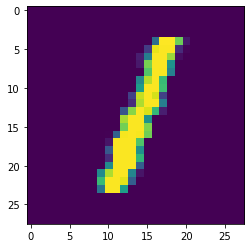

In [5]:
# verifying data
iter_var = iter(trainloader)
images, labels = iter_var.next()
plt.imshow(images[4].numpy().squeeze())
print(labels[4])

In [6]:
#building model
from collections import OrderedDict
model = nn.Sequential(OrderedDict([
          ('InputLayer',nn.Linear(784,128)),
          ('Relu1',nn.ReLU()),
          ('HiddenLayer',nn.Linear(128,64)),
          ('Relu2',nn.ReLU()),
          ('OutputLayer',nn.Linear(64,10)),
          ('Softmax',nn.Softmax(dim=1)),                    
]))

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [9]:
# training
epochs = 3
print_every = 50
running_loss = 0
step = 0
for e in range(epochs):
  for images, labels in trainloader:
    step += 1
    images.resize_(images.shape[0], 784)
    optimizer.zero_grad()
    output = model.forward(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    running_loss+=loss.item()
    if step % print_every == 0:
      print('epocs {}/{} with running loss {}'.format(e+1,epochs,running_loss/print_every))
      running_loss = 0


epocs 1/3 with running loss 2.301346206665039
epocs 1/3 with running loss 2.3003280925750733
epocs 1/3 with running loss 2.299088191986084
epocs 1/3 with running loss 2.2982191705703734
epocs 1/3 with running loss 2.297257342338562
epocs 1/3 with running loss 2.296124792098999
epocs 1/3 with running loss 2.2947311115264895
epocs 1/3 with running loss 2.293923816680908
epocs 1/3 with running loss 2.2925721120834353
epocs 1/3 with running loss 2.2903410243988036
epocs 1/3 with running loss 2.2888345861434938
epocs 1/3 with running loss 2.287828311920166
epocs 1/3 with running loss 2.284102268218994
epocs 1/3 with running loss 2.283163537979126
epocs 1/3 with running loss 2.279942765235901
epocs 1/3 with running loss 2.2758306455612183
epocs 1/3 with running loss 2.2721207904815675
epocs 1/3 with running loss 2.2644882440567016
epocs 2/3 with running loss 2.256415991783142
epocs 2/3 with running loss 2.2523171663284303
epocs 2/3 with running loss 2.241733794212341
epocs 2/3 with running l

label - 8
tensor([[0.0882, 0.0889, 0.0884, 0.1028, 0.0884, 0.0879, 0.0881, 0.0894, 0.1899,
         0.0880]])
number tensor([8]) with probability tensor([0.1899]) 


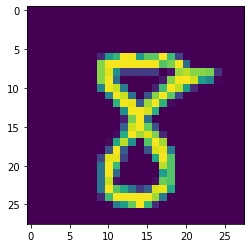

In [32]:
temp = iter(testloader)
image, label = temp.next()
plt.imshow(image[0].numpy().squeeze())
with torch.no_grad():
  out = model.forward(image[0].resize_(1,784))
ps= nn.functional.softmax(out,dim=1) 
print("label - {}".format(label[0]))
print(ps)
p, value = ps.max(1)
print("number {} with probability {} ".format(value, p))

In [31]:
print(model)

Sequential(
  (InputLayer): Linear(in_features=784, out_features=128, bias=True)
  (Relu1): ReLU()
  (HiddenLayer): Linear(in_features=128, out_features=64, bias=True)
  (Relu2): ReLU()
  (OutputLayer): Linear(in_features=64, out_features=10, bias=True)
  (Softmax): Softmax(dim=1)
)
